### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import KNNImputer #Impute values based on highly correlated features
from sklearn.impute import SimpleImputer #For imputing with median/mean

In [3]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LassoCV

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Exploring Train Dataset

<b> Train Functional Connectome Matrices </b>

In [5]:
# Functional Brain Imaging Data
data_tfcm = pd.read_csv("TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
data_tfcm.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [6]:
# Checking for Null Values
null_counts = data_tfcm.isnull().sum()
null_counts = null_counts[null_counts>0]
print(null_counts)

Series([], dtype: int64)


- There are no NULL values in the MRI scan data

<b> Quant Data </b>

In [7]:
# Quantitative Data
data_quant = pd.read_excel("TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA.xlsx",sheet_name="training_combined")
data_quant.sample(n=5)

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
1000,UOp7nqv0n9PH,100.00,8.0,9.0,10.0,42.0,19.0,18.0,27.0,0.0,7.0,0.0,7.0,5.0,7.0,0.0,0.0,9.0,11.062172
1010,UvIfVZWHRSd1,-31.13,14.0,5.0,15.0,43.0,22.0,12.0,27.0,4.0,17.0,1.0,13.0,6.0,9.0,4.0,3.0,3.0,8.447638
993,ulkctrRjT5vt,66.67,14.0,3.0,14.0,40.0,15.0,29.0,23.0,3.0,13.0,1.0,7.0,7.0,4.0,6.0,5.0,6.0,17.912731
287,CkpuWtOhgCHN,80.00,14.0,3.0,10.0,40.0,18.0,14.0,25.0,1.0,9.0,2.0,6.0,5.0,5.0,3.0,1.0,8.0,NaN
436,gBFdKiRllu4B,20.00,14.0,4.0,16.0,33.0,20.0,29.0,23.0,3.0,19.0,3.0,12.0,6.0,9.0,7.0,4.0,7.0,17.576089


In [8]:
# Size
data_quant.shape

(1213, 19)

In [9]:
# Info
data_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1200 non-null   float64
 2   ColorVision_CV_Score        1190 non-null   float64
 3   APQ_P_APQ_P_CP              1201 non-null   float64
 4   APQ_P_APQ_P_ID              1201 non-null   float64
 5   APQ_P_APQ_P_INV             1201 non-null   float64
 6   APQ_P_APQ_P_OPD             1201 non-null   float64
 7   APQ_P_APQ_P_PM              1201 non-null   float64
 8   APQ_P_APQ_P_PP              1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total  1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems  1204 non-null   float64
 12  SDQ_SDQ_Externalizing       1204 non-null   float64
 13  SDQ_SDQ_Generating_Impact   1204 

<b> Changes in the new dataset from the old one </b>
 - Null values introduced in every column

In [10]:
# Count rows where all columns have NaN values
num_all_null_rows = data_quant.isnull().all(axis=1).sum()

print(f"Number of rows with all null values: {num_all_null_rows}")

Number of rows with all null values: 0


<b> Univariate Analysis </b>

In [11]:
# Descriptive Analysis
data_quant.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1200.000000,1190.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,853.000000
mean,59.514750,13.419328,3.819317,13.337219,39.767694,17.963364,16.557036,25.498751,2.074751,12.213455,2.324751,7.613787,4.103821,5.539037,4.599668,2.274917,7.740864,11.245678
std,49.744631,2.112830,1.330348,3.593562,4.872729,3.333965,5.146548,3.053720,2.022992,6.517330,2.166399,4.130399,2.808079,2.807063,3.510469,2.089041,2.094832,3.234372
min,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,5.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,77.800000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,8.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


<Axes: xlabel='EHQ_EHQ_Total', ylabel='Count'>

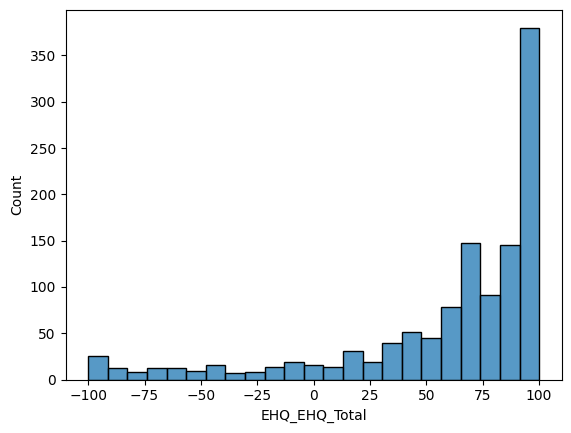

In [12]:
# Distribution of EHQ_EHQ
sns.histplot(data_quant['EHQ_EHQ_Total'])

<font color='red'> <b> Edinburgh Handedness Questionnaire:</b> Edinburgh Handedness Inventory is a measurement scale used to assess the dominance of a person's right or left hand in everyday activities. The inventory can be used by an observer assessing the person, or by a person self-reporting hand use.

- -100 = 10th left
- 
−28 ≤ LI < 48 = middle
- 
100 = 10th right
</font>

<Axes: xlabel='ColorVision_CV_Score', ylabel='Count'>

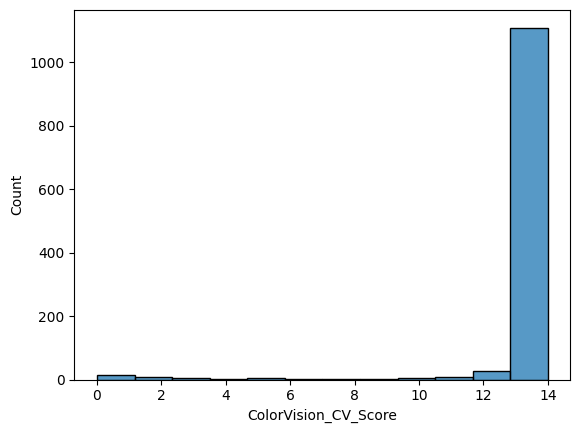

In [13]:
# Distribution of Colorvision Score
sns.histplot(data_quant['ColorVision_CV_Score'])

<font color='red'> <b>Red-green color vision defect (Red-Green Color Blindness)</b> is a type of color vision deficiency where a person has difficulty distinguishing between red and green hues. It is the most common form of color blindness and is usually inherited through the X chromosome, making it <b> more common in males than females </b>

Interpreting Scores:
- 0-2 → Likely severe red-green color blindness.
- 3-5 → Mild to moderate color blindness.
- 6+ → Likely normal color vision.
</font>

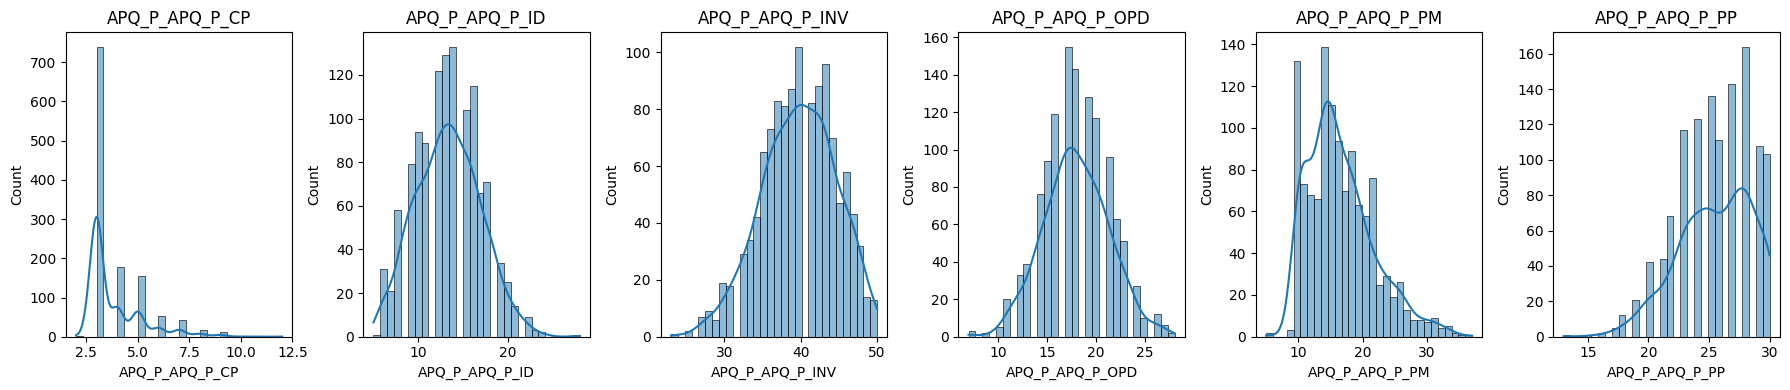

In [14]:
# Distribution of APQ Plots
features = ['APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']

fig, axes = plt.subplots(1, 6, figsize=(18, 4)) 

# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(data_quant[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout() 
plt.show()

<font color='red'> <b> Alabama Parenting Questionnaire - Parent Report </b></font>
- APQ_P_APQ_P_CP	Corporal Punishment Score
- 
APQ_P_APQ_P_ID	Inconsistent Discipline Score
- 
APQ_P_APQ_P_INV	Involvement Scor
- e
APQ_P_APQ_P_OPD	Other Discipline Practices Score (Not factored into total score but provides item level informatio
- n)
APQ_P_APQ_P_PM	Poor Monitoring/Supervision Sc
- ore
APQ_P_APQ_P_PP	Positive Parenting core


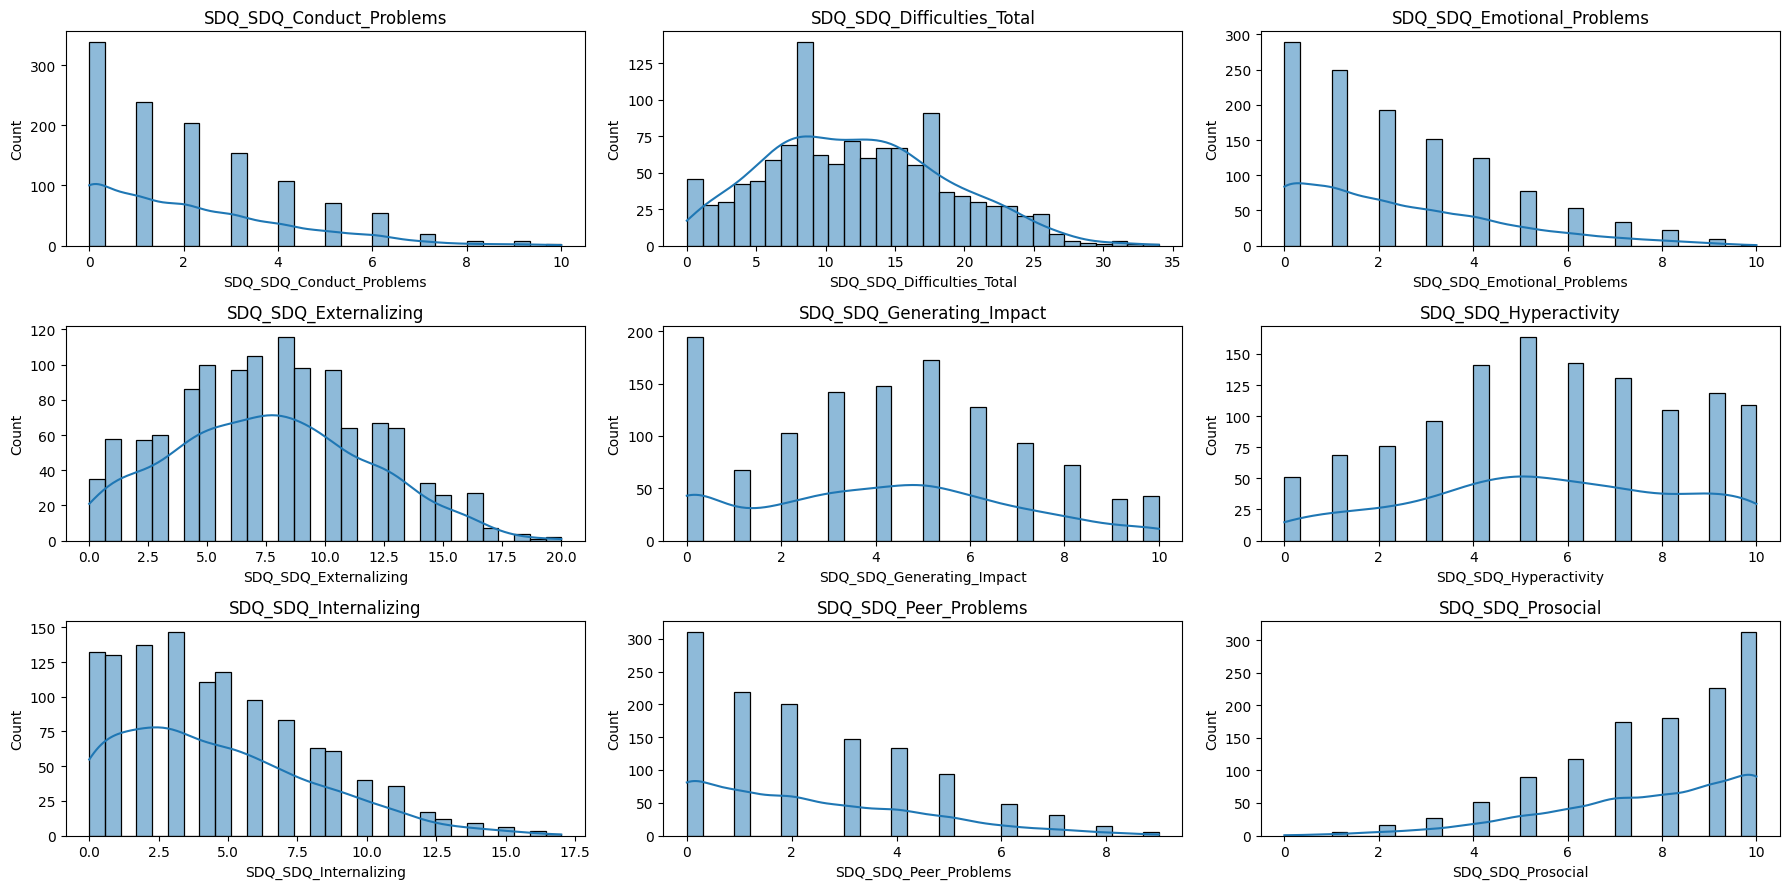

In [15]:
# Distribution of SDQ Plots
features = ['SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity','SDQ_SDQ_Internalizing','SDQ_SDQ_Peer_Problems','SDQ_SDQ_Prosocial']

fig, axes = plt.subplots(3, 3, figsize=(18, 9)) 

# Plot histograms for each feature
for i, feature in enumerate(features):
    row, col = divmod(i, 3)  # Convert index to row and column
    sns.histplot(data_quant[feature], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout() 
plt.show()

<font color='red'><b> Strength and Difficulties Questionnaire</b></font>

- SDQ_SDQ_Conduct_Problems: Conduct problems scale
- 
SDQ_SDQ_Difficulties_Tota: 	Total Difficulties Score
- 
SDQ_SDQ_Emotional_Proble: s	Emotional Problems Scal
- e
SDQ_SDQ_Externaliz: ng	Externalizing Sco
- re
SDQ_SDQ_Generating_Im: act	Generating Impact Sco
- res
SDQ_SDQ_Hyperact: vity	Hyperactivity S
- cale
SDQ_SDQ_Interna: izing	Internalizing 
- Score
SDQ_SDQ_Peer_P: oblems	Peer Problems
-  Scale
SDQ_SDQ_P: osocial	Prosoci Scale



<Axes: xlabel='MRI_Track_Age_at_Scan', ylabel='Count'>

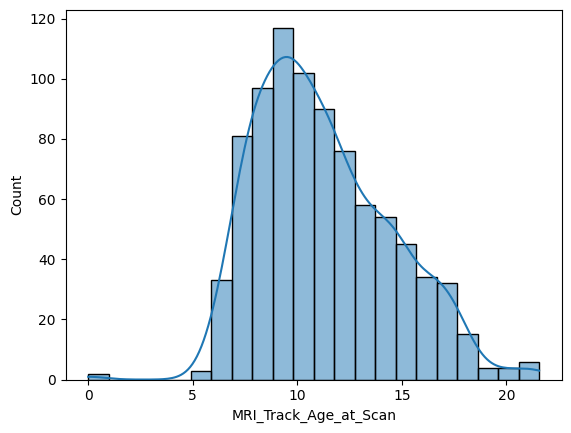

In [16]:
# Distribution of Age
sns.histplot(data_quant['MRI_Track_Age_at_Scan'], kde=True)

In [17]:
data_quant[data_quant['MRI_Track_Age_at_Scan'] == 0].size

38

In [18]:
# Coefficient of Variation
np.std(data_quant['MRI_Track_Age_at_Scan'])/np.mean(data_quant['MRI_Track_Age_at_Scan'])*100

28.74416020338608

<font color='red'> <b> How to Interpret CV? </b> </font>

Lower CV (e.g., < 10%) → Data is less dispersed (more consistent, low variability).

Higher CV (e.g., > 30%) → Data has high variability (more spread out, less consistent).

CV > 1 (or 100%) → High dispersion; the standard deviation is greater than the mean.

- High variability in data
- We cannot impute the data with mean as the data has a high standard deviation and is not normally distributed 

<b> Target Data </b>

In [19]:
# Target variables
data_ts = pd.read_excel("TRAIN_NEW/TRAINING_SOLUTIONS.xlsx",sheet_name="training_combined")
data_ts.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [20]:
data_ts.isna().sum()

participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64

In [45]:
data_ts['ADHD_Outcome'].value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

In [46]:
data_ts['Sex_F'].value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

In [44]:
# Create the combination column and calculate counts and percentages
result_df = (data_ts.assign(ADHD_Sex=data_ts['ADHD_Outcome'].astype(str) + ' & ' + data_ts['Sex_F'].replace({1: 'F', 0: 'M'}))
             .groupby('ADHD_Sex')
             .size()
             .reset_index(name='Count')
             .assign(Percentage=lambda x: (x['Count'] / len(data_ts)) * 100))

print(result_df)

  ADHD_Sex  Count  Percentage
0    0 & F    166   13.685078
1    0 & M    216   17.807090
2    1 & F    250   20.610058
3    1 & M    581   47.897774


<b> Categorical Data </b>

In [21]:
# Target variables
data_cm = pd.read_excel("TRAIN_NEW/TRAIN_CATEGORICAL_METADATA.xlsx",sheet_name="training_combined")
data_cm.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [22]:
# Check for null values
data_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [23]:
# Mode Values of all the features
data_cm.drop(columns='participant_id').mode().iloc[0]

Basic_Demos_Enroll_Year             2018.0
Basic_Demos_Study_Site                 1.0
PreInt_Demos_Fam_Child_Ethnicity       0.0
PreInt_Demos_Fam_Child_Race            0.0
MRI_Track_Scan_Location                2.0
Barratt_Barratt_P1_Edu                21.0
Barratt_Barratt_P1_Occ                 0.0
Barratt_Barratt_P2_Edu                21.0
Barratt_Barratt_P2_Occ                45.0
Name: 0, dtype: float64

In [24]:
# Descriptive on CM
data_cm.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1170.000000,1159.000000,1210.000000,1198.000000,1182.000000,1015.000000,991.000000
mean,2017.652102,2.014839,0.435897,2.177739,2.294215,17.862270,25.545685,16.876847,30.257316
std,1.122522,1.135147,0.693174,3.204782,0.750660,3.505608,16.757043,3.929558,13.901144
min,2015.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,5.000000,15.000000,20.000000
50%,2018.000000,1.000000,0.000000,1.000000,2.000000,18.000000,30.000000,18.000000,35.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


<b> Multivariate Analysis </b>

In [26]:
# Merge Quant & TS datasets
data_quant_ts = pd.merge(data_quant, data_ts, on='participant_id', how='outer')
data_quant_ts.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,...,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127,1,0
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,...,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN,1,0
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,...,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381,0,1
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,...,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553,0,1
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,...,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574,1,0


In [27]:
data_quant_ts.shape

(1213, 21)

Types of Correlation:

1) Pearson Correlation (default in df.corr())

- Measures linear relationships between variables.

- Ranges from -1 to 1:

- 1 → Perfect positive correlation

- -1 → Perfect negative correlation

- 0 → No correlation

- Works best with normally distributed numerical data.

2) Spearman Correlation (df.corr(method='spearman'))

- Measures monotonic relationships (i.e., as one variable increases, the other increases/decreases, but not necessarily at a constant rate).

- Useful for ordinal data or when the relationship is non-linear.

3) Kendall Tau Correlation (df.corr(method='kendall'))

- Measures the association between ranked variables.

- Best for small datasets or cases with many tied values.

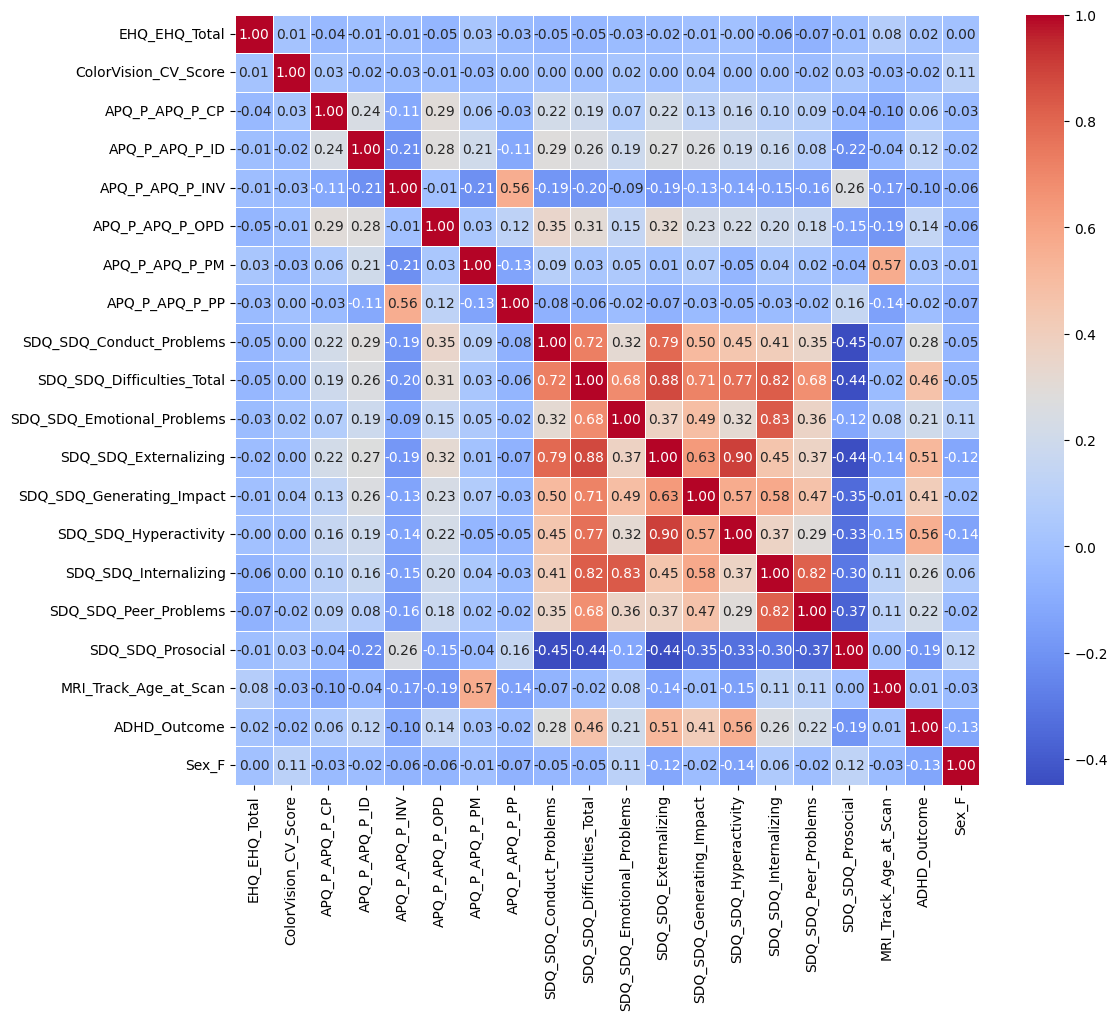

In [28]:
# Pairwise Correlation
corr_matrix = data_quant_ts.drop(columns='participant_id').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.show()

<b> Observations </b>

- Hyperactivity, Externalizing, Difficulties_total, Generating impact has a high correlation with ADHD

- As the age increases, poor monitoring/supervision score increases (high positive correlation)

- All the SDQ features are highly correlated with each other

- Features have a weak correlation with Sex_F

- Involvement (INV) score has ahigh correlation with positive parenting (PP) score

In [29]:
# Merge Quant & TS & CM datasets
data_quant_ts_cm = pd.merge(data_quant_ts, data_cm, on='participant_id', how='outer')
data_quant_ts_cm.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,Sex_F,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,...,0,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,...,0,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,...,1,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,...,1,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,...,0,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [30]:
data_quant_ts_cm.shape

(1213, 30)

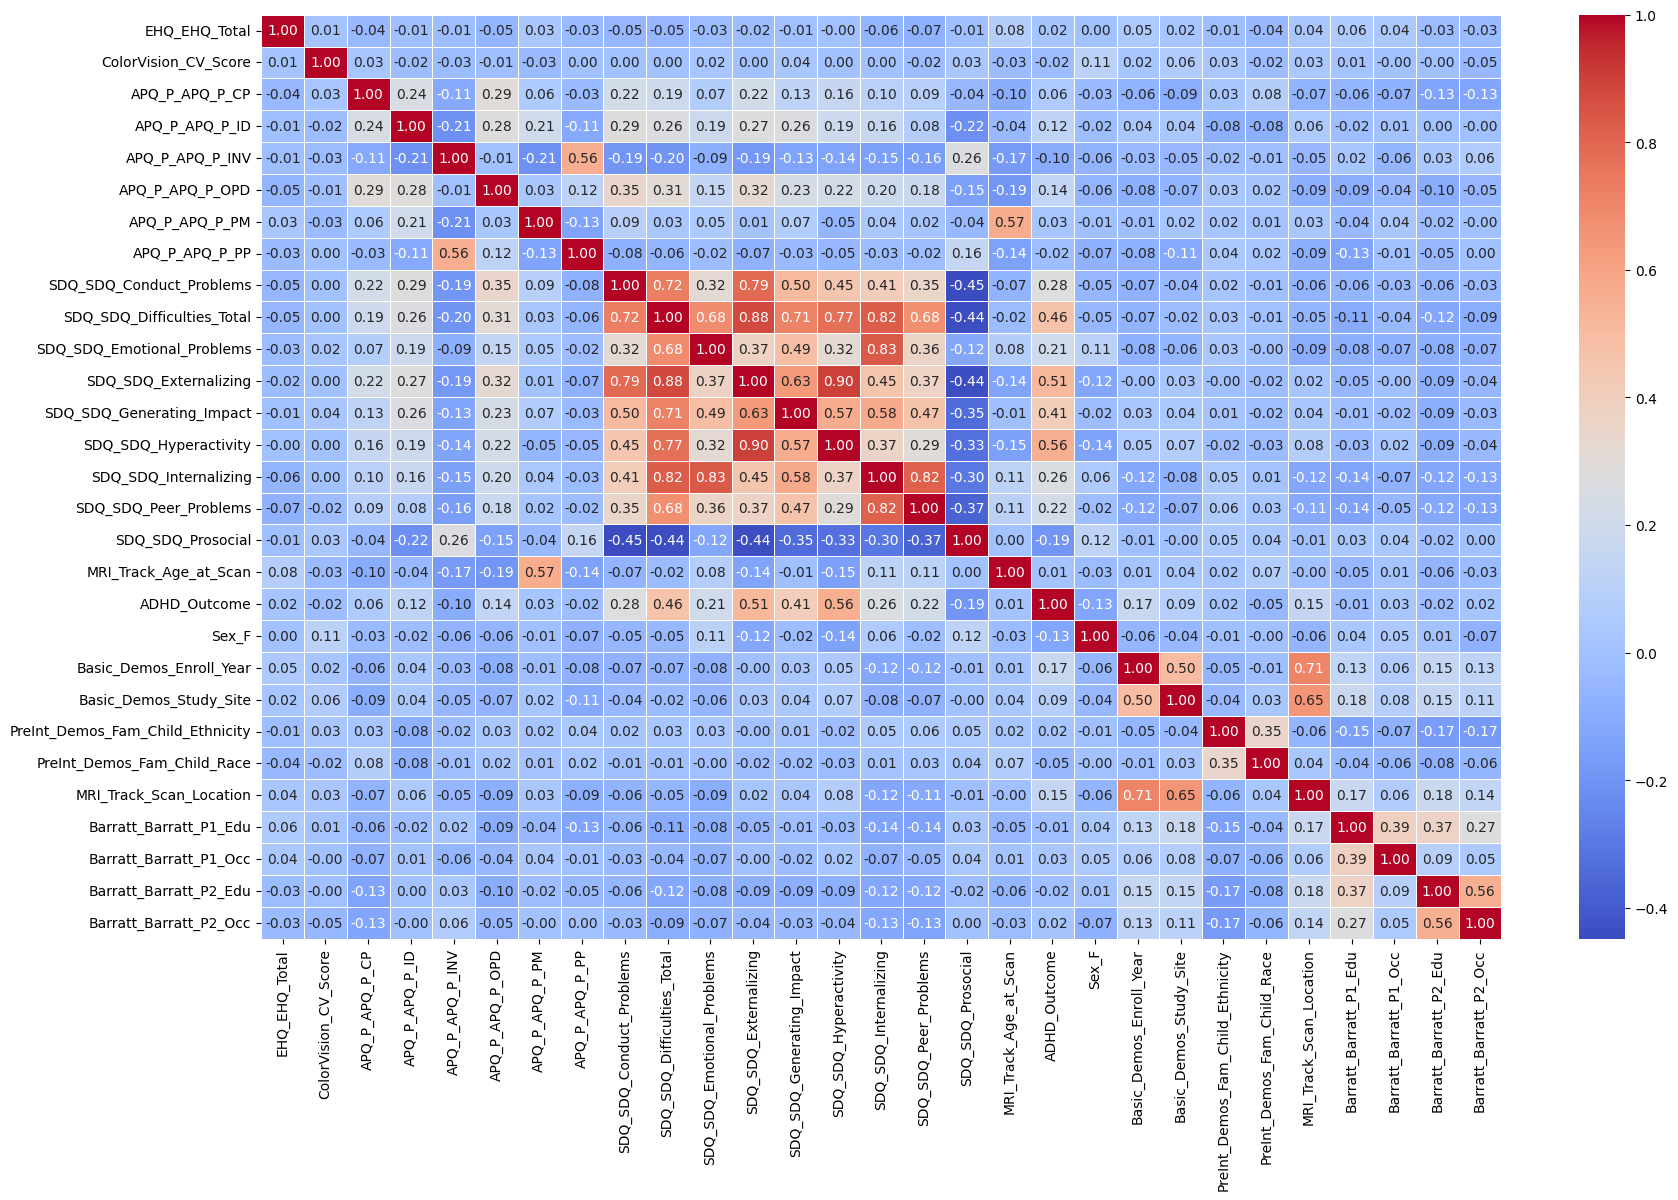

In [31]:
# Pairwise Correlation
corr_matrix = data_quant_ts_cm.drop(columns='participant_id').corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.show()

------------

<font color = 'green'> <b> Experiment 1: Taking all data to predict both ADHD and sex using LightGBM </b></font>

In [35]:
data_all = pd.merge(data_tfcm, data_quant_ts_cm, on='participant_id', how='outer')
data_all.shape

(1213, 19930)

In [47]:
null_counts = data_all.isnull().sum()
null_counts = null_counts[null_counts > 1].sort_values(ascending=False)
print(null_counts)

MRI_Track_Age_at_Scan               360
Barratt_Barratt_P2_Occ              222
Barratt_Barratt_P2_Edu              198
PreInt_Demos_Fam_Child_Race          54
PreInt_Demos_Fam_Child_Ethnicity     43
Barratt_Barratt_P1_Occ               31
ColorVision_CV_Score                 23
Barratt_Barratt_P1_Edu               15
EHQ_EHQ_Total                        13
APQ_P_APQ_P_PP                       12
APQ_P_APQ_P_PM                       12
APQ_P_APQ_P_OPD                      12
APQ_P_APQ_P_INV                      12
APQ_P_APQ_P_ID                       12
APQ_P_APQ_P_CP                       12
SDQ_SDQ_Difficulties_Total            9
SDQ_SDQ_Emotional_Problems            9
SDQ_SDQ_Externalizing                 9
SDQ_SDQ_Conduct_Problems              9
SDQ_SDQ_Hyperactivity                 9
SDQ_SDQ_Internalizing                 9
SDQ_SDQ_Peer_Problems                 9
SDQ_SDQ_Prosocial                     9
SDQ_SDQ_Generating_Impact             9
MRI_Track_Scan_Location               3


In [53]:
missing_count_df = pd.DataFrame(null_counts)
missing_count_df.rename(columns={0:'Count'}, inplace=True)

In [55]:
missing_count_df['Percentage'] = (missing_count_df['Count']/data_all.shape[0])*100
missing_count_df

,Count,Percentage
MRI_Track_Age_at_Scan,360,29.678483
Barratt_Barratt_P2_Occ,222,18.301731
Barratt_Barratt_P2_Edu,198,16.323166
PreInt_Demos_Fam_Child_Race,54,4.451772
PreInt_Demos_Fam_Child_Ethnicity,43,3.544930
Barratt_Barratt_P1_Occ,31,2.555647
ColorVision_CV_Score,23,1.896125
Barratt_Barratt_P1_Edu,15,1.236603
EHQ_EHQ_Total,13,1.071723
APQ_P_APQ_P_PP,12,0.989283


In [56]:
data_all.to_csv("train_data_final_v2_5Apr.csv", index=False)

---------

### Data Cleaning

#### Handling Missing Values

##### PreInt_Demos_Fam_Child_Ethnicity

In [ ]:
# Fill with '2 - Decline to Specify'
data_quant_ts_cm['PreInt_Demos_Fam_Child_Ethnicity'] = data_quant_ts_cm['PreInt_Demos_Fam_Child_Ethnicity'].fillna(2)

In [ ]:
data_quant_ts_cm.info()

In [ ]:
# Correlation
corr_matrix = data_quant_ts_cm.drop(columns='participant_id').corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.show()

##### MRI_Track_Age_at_Scan

In [ ]:
# Distribution of 'MRI_Track_Age_at_Scan' before imputation
data_quant['MRI_Track_Age_at_Scan'].describe()

In [ ]:
sns.histplot(data_quant['MRI_Track_Age_at_Scan'])

- Imputing missing values in MRI_Track_Age_at_Scan using the KNN Imputation
- Missing values will be filled using the 5 nearest neighbors in APQ_P_APQ_P_PM

In [ ]:
"""
# Initialize KNN Imputer with 5 nearest neighbors
imputer = KNNImputer(n_neighbors=5)

# Apply imputer only on the 'f2' column using 'f1' as reference
data_quant_ts_cm[['MRI_Track_Age_at_Scan']] = imputer.fit_transform(data_quant_ts_cm[['MRI_Track_Age_at_Scan', 'APQ_P_APQ_P_PM']])[:, 0].reshape(-1, 1)

# Check for null values
print(data_quant_ts_cm['MRI_Track_Age_at_Scan'].isnull().sum())

print(data_quant_ts_cm['MRI_Track_Age_at_Scan'].describe())

sns.histplot(data_quant_ts_cm['MRI_Track_Age_at_Scan'])
"""

<b> Regression over KNN for Imputation </b>
1. KNN struggles with distance calculations in high dimensions.
2. KNN is slow due to comparing all data points.
3. Data sparsity makes it hard for KNN to find good neighbors.
4. Regression learns patterns instead of just relying on neighbors.
5. Regression handles many features more efficiently.
6. Regression provides more accurate imputation.

Imputation using 'Median' and how does it change the distribution

In [ ]:
# And, if we impute with the median value
data_quant_copy1 = data_quant.copy()

# Initialize SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Apply imputation
data_quant_copy1['MRI_Track_Age_at_Scan'] = imputer.fit_transform(data_quant_copy1[['MRI_Track_Age_at_Scan']])

In [ ]:
data_quant_copy1['MRI_Track_Age_at_Scan'].describe()

In [ ]:
sns.histplot(data_quant_copy1['MRI_Track_Age_at_Scan'])

Imputation using 'Mean' and how does it change the distribution

In [ ]:
# And, if we impute with the median value
data_quant_copy2 = data_quant.copy()

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Apply imputation
data_quant_copy2['MRI_Track_Age_at_Scan'] = imputer.fit_transform(data_quant_copy2[['MRI_Track_Age_at_Scan']])

In [ ]:
data_quant_copy2['MRI_Track_Age_at_Scan'].describe()

In [ ]:
sns.histplot(data_quant_copy2['MRI_Track_Age_at_Scan'])

##### Imputation using Random Forest Regressor

In [ ]:
data_tfcm_age = data_tfcm.merge(data_quant[['participant_id', 'MRI_Track_Age_at_Scan']], on='participant_id', how='left')
data_tfcm_age.head()

Training the model and validating it using the holdout set

In [ ]:
# Subset containing only Non-Null values for 'Age'
known_values = data_tfcm_age.dropna(subset=['MRI_Track_Age_at_Scan'])
known_values.shape

In [ ]:
X = known_values.drop(columns=['MRI_Track_Age_at_Scan', 'participant_id'])
y = known_values['MRI_Track_Age_at_Scan']

Seelcting top 100 most correlated features to reduce dimensionality of our dataset

In [ ]:
# Select top 100 most correlated features
selector = SelectKBest(score_func=f_regression, k=100)
X_selected = selector.fit_transform(X, y)

In [ ]:
# Holdout 20% of Known Values
known_values_20_perc = known_values.sample(frac=0.2, random_state=40)
known_values_20_perc.shape

In [ ]:
# Create a copy of the subset having non-null values for 'Age'
data_temp = known_values.copy()

In [ ]:
# Simulating missing values
data_temp.loc[known_values_20_perc.index, 'MRI_Track_Age_at_Scan'] = np.nan

In [ ]:
# Preparing train data (known values) on Reduced Features
train_data = data_temp.dropna(subset=['MRI_Track_Age_at_Scan'])
X_train = selector.transform(train_data.drop(columns=['participant_id', 'MRI_Track_Age_at_Scan']))
y_train = train_data['MRI_Track_Age_at_Scan']

In [ ]:
# Prepare test data (where Age is missing) on Reduced Features
missing_data = data_temp[data_temp['MRI_Track_Age_at_Scan'].isna()]
X_test = selector.transform(missing_data.drop(columns=['participant_id', 'MRI_Track_Age_at_Scan']))

In [ ]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

In [ ]:
# Predict Missing Values
data_temp.loc[data_temp['MRI_Track_Age_at_Scan'].isna(), 'MRI_Track_Age_at_Scan'] = rf.predict(X_test)

In [ ]:
# Validate with RMSE
rmse = np.sqrt(mean_squared_error(known_values_20_perc['MRI_Track_Age_at_Scan'], data_temp.loc[known_values_20_perc.index, 'MRI_Track_Age_at_Scan']))
print(f"RMSE of imputation: {rmse:.2f}")

<font color='red'> When I selected 100 best features that are highly correlated with our target variable (dimensionality reduction), RMSE was 2.70. However, when I selected 19900 features (all of them), RMSE was 2.82.</font>

<font color='red'>The independent features (fMRI connectome) are highly correlated and that is why we will use either PCA or lasso regression for dimensionality reduction. </font>

In [ ]:
# Apply Lasso with cross-validation to find the best alpha (regularization strength) (alternative to the selector used earlier)
lasso = LassoCV(cv=5, random_state=42) #Performs Lasso regression with 5-fold cross-validation to find the best alpha (penalty parameter)
lasso.fit(X, y)

# Get selected features (non-zero coefficients)
selected_features_names = X.columns[lasso.coef_ != 0]  # Get feature names
X_selected = X[selected_features_names]  # Select only important features

# Print how many features were selected
print(f"Number of selected features: {len(selected_features)}")

In [ ]:
# Holdout 20% of Known Values
known_values_20_perc = known_values.sample(frac=0.2, random_state=40)
known_values_20_perc.shape

# Create a copy of the subset having non-null values for 'Age'
data_temp = known_values.copy()

# Simulating missing values
data_temp.loc[known_values_20_perc.index, 'MRI_Track_Age_at_Scan'] = np.nan

In [ ]:
# Preparing train data (known values) on Reduced Features
train_data = data_temp.dropna(subset=['MRI_Track_Age_at_Scan'])
X_train_full = train_data.drop(columns=['participant_id', 'MRI_Track_Age_at_Scan'])

# Select the same features as identified by Lasso
X_train = X_train_full.iloc[:, selected_features]
y_train = train_data['MRI_Track_Age_at_Scan']

print(f"Shape of X_train after feature selection: {X_train.shape}")

In [ ]:
# Prepare test data (where Age is missing) on Reduced Features
missing_data = data_temp[data_temp['MRI_Track_Age_at_Scan'].isna()]
X_test_full = missing_data.drop(columns=['participant_id', 'MRI_Track_Age_at_Scan'])

X_test = X_test_full.iloc[:, selected_features]

In [ ]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

In [ ]:
# Predict Missing Values
data_temp.loc[data_temp['MRI_Track_Age_at_Scan'].isna(), 'MRI_Track_Age_at_Scan'] = rf.predict(X_test)

In [ ]:
# Validate with RMSE
rmse = np.sqrt(mean_squared_error(known_values_20_perc['MRI_Track_Age_at_Scan'], data_temp.loc[known_values_20_perc.index, 'MRI_Track_Age_at_Scan']))
print(f"RMSE of imputation: {rmse:.2f}")

In [ ]:
# Impute missing values in the actual dataset - 'data_tfcm_age'

# Prepare test data (actual dataset where Age is missing)
X_actual_full = data_tfcm_age.drop(columns=['participant_id', 'MRI_Track_Age_at_Scan'])
X_actual = X_actual_full[selected_features_names]

In [ ]:
# Identify missing values in actual dataset
missing_indices = data_tfcm_age['MRI_Track_Age_at_Scan'].isna()

In [ ]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X,y) #This was defined earlier

In [ ]:
# Predict missing values using trained Random Forest model
data_tfcm_age.loc[missing_indices, 'MRI_Track_Age_at_Scan'] = rf.predict(X_actual[missing_indices])
print(f"Number of missing values imputed: {missing_indices.sum()}")

Make one training dataset to use for model building

In [ ]:
data_quant_ts_cm = data_quant_ts_cm.drop(columns=['MRI_Track_Age_at_Scan'])

In [ ]:
data_tfcm_quant_ts_cm = pd.merge(data_tfcm_age, data_quant_ts_cm, on='participant_id', how='outer')
data_tfcm_quant_ts_cm.shape

In [ ]:
data_tfcm_quant_ts_cm['MRI_Track_Age_at_Scan'].isna().sum()

In [ ]:
data_tfcm_quant_ts_cm.to_csv("train_data_final1.csv", index=False)

In [ ]:
data_tfcm_quant_ts